In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

### Fuzzy 2 - Classificação do Grau de Risco de uma stock
1. INPUTS
    * Média de Variação (famosa volatilidade)
        1. Universo: Qual foi a média de variação no valor das stocks (em módulo)?
        2. Conjunto Fuzzy: baixo, média, alto
    * Beta
        1. Universo: Qual o valor da volatilidade da stock com relação a volatilidade do mercado?
        2. Conjunto Fuzzy: baixo, alto
2. OUTPUTS
    * Risco
        1. Universo: Qual o grau de risco ao se investir nessa stock ?
        2. Conjunto Fuzzy: baixo, médio, alto
3. RULES
    * Se um deles for baixo &rarr; baixo
    * Se um deles for alto &rarr; alto
    * Se um deles for medio &rarr; medio

#### Input1: volatilidade

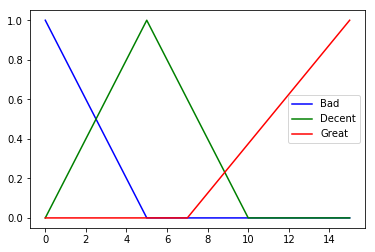

In [157]:
x_vol = np.arange(0, 16, 1)

vol_lo = fuzz.trimf(x_vol, [0, 0, 5])
vol_md = fuzz.trimf(x_vol, [0, 5, 10])
vol_hi = fuzz.trimf(x_vol, [7, 15, 15])

plt.plot(x_vol, vol_lo, 'b', linewidth=1.5, label='Bad')
plt.plot(x_vol, vol_md, 'g', linewidth=1.5, label='Decent')
plt.plot(x_vol, vol_hi, 'r', linewidth=1.5, label='Great')
plt.legend()
plt.show()

#### Input2: Beta

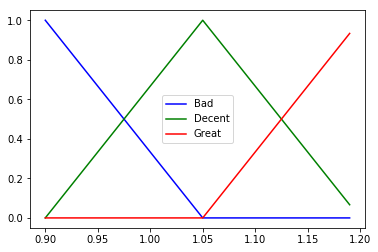

In [158]:
x_beta = np.arange(0.9, 1.2, 0.01)

beta_lo = fuzz.trimf(x_beta, [0.9, 0.9, 1.05])
beta_md = fuzz.trimf(x_beta, [0.9, 1.05, 1.2])
beta_hi = fuzz.trimf(x_beta, [1.05, 1.2, 1.2])

plt.plot(x_beta, beta_lo, 'b', linewidth=1.5, label='Bad')
plt.plot(x_beta, beta_md, 'g', linewidth=1.5, label='Decent')
plt.plot(x_beta, beta_hi, 'r', linewidth=1.5, label='Great')
plt.legend()
plt.show()

In [159]:
# x_beta = np.arange(0.0, 1.6, 0.01)

# beta_lo = fuzz.trimf(x_beta, [0, 0, 0.75])
# beta_md = fuzz.trimf(x_beta, [0, 0.75, 1.5])
# beta_hi = fuzz.trimf(x_beta, [0.75, 1.0, 1.5])

# plt.plot(x_beta, beta_lo, 'b', linewidth=1.5, label='Bad')
# plt.plot(x_beta, beta_md, 'g', linewidth=1.5, label='Decent')
# plt.plot(x_beta, beta_hi, 'r', linewidth=1.5, label='Great')
# plt.legend()
# plt.show()

#### Output: risk

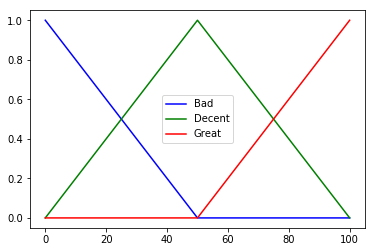

In [160]:
x_risk = np.arange(0, 101, 1)

risk_lo = fuzz.trimf(x_risk, [0, 0, 50])
risk_md = fuzz.trimf(x_risk, [0, 50, 100])
risk_hi = fuzz.trimf(x_risk, [50, 100, 100])

plt.plot(x_risk, risk_lo, 'b', linewidth=1.5, label='Bad')
plt.plot(x_risk, risk_md, 'g', linewidth=1.5, label='Decent')
plt.plot(x_risk, risk_hi, 'r', linewidth=1.5, label='Great')
plt.legend()
plt.show()

#### Ativa as funcoes fuzzy no valor do input

In [175]:
vol_level_lo = fuzz.interp_membership(x_vol, vol_lo, 1.0)
vol_level_md = fuzz.interp_membership(x_vol, vol_md, 1.0)
vol_level_hi = fuzz.interp_membership(x_vol, vol_hi, 1.0)

beta_level_lo = fuzz.interp_membership(x_beta, beta_lo, 1.1)
beta_level_md = fuzz.interp_membership(x_beta, beta_md, 1.1)
beta_level_hi = fuzz.interp_membership(x_beta, beta_hi, 1.1)

#### REGRAS

In [176]:
# Rule 1 --> low vol OR beta
# The OR operator means we take the maximum of these two.
rule1 = np.fmax(vol_level_lo, beta_level_lo)
activation_lo = np.fmin(rule1, risk_lo)

# Rule 2 --> high vol OR beta
rule2 = np.fmax(vol_level_hi, beta_level_hi)
activation_hi = np.fmin(rule2, risk_hi)

# Rule 3 --> medium vol to medium risk
activation_md = np.fmin(vol_level_md, risk_md)

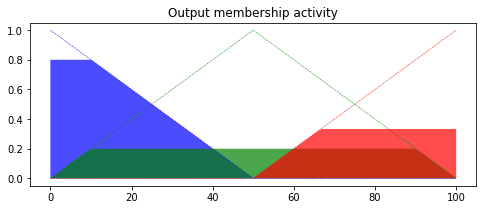

In [177]:
# visualizacao
risk0 = np.zeros_like(x_risk)

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_risk, risk0, activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_risk, risk_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_risk, risk0, activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_risk, risk_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_risk, risk0, activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_risk, risk_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')
plt.show()

#### Defuzzification

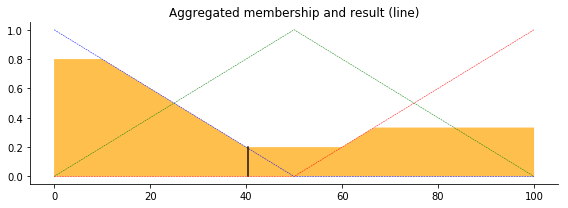

In [178]:
# Aggregate all three output membership functions together
aggregated = np.fmax(activation_lo, np.fmax(activation_md, activation_hi))

# Calculate defuzzified result
risk = fuzz.defuzz(x_risk, aggregated, 'centroid')
risk_activation = fuzz.interp_membership(x_risk, aggregated, risk)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_risk, risk_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_risk, risk_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_risk, risk_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_risk, risk0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([risk, risk], [0, risk_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [179]:
print("Risco indicado de: ", round(risk,2))

Risco indicado de:  40.34
